In [13]:
import numpy as np
import pandas as pd
import os

In [14]:
#Reading the song lyrics txt files
path_to_files = './lyrics/'
lyrics = {}
names = []
numfiles = 0
for filename in os.listdir(path_to_files):
    if filename.endswith(".txt"):
        with open(os.path.join(path_to_files, filename), 'r') as f:
            #lyrics.append(f.read())
            #names.append(filename)
            lyric = f.read()
            numfiles+=1
            if lyric not in lyrics.values():
                lyrics[filename] = lyric

In [15]:
numfiles

279

In [16]:
len(lyrics)

218

In [17]:
#Average wordcount of a song
sum( map(len, lyrics.values()) ) / len(lyrics.values())

829.545871559633

In [18]:
#Getting rid of null lyrics 
clean_lyrics = {key:val for (key,val) in lyrics.items() if len(val)>50}

In [19]:
len(clean_lyrics)

215

Q1. How many of the songs feature the song name (found in the file name) in the song lyrics?

In [20]:
clean_lyrics['ain-t-she-sweet.txt']

"Oh ain't she sweet,\nWell see her walking down that street.\nYes I ask you very confidentially:\nAin't she sweet?\n\nOh ain't she nice,\nWell look her over once or twice.\nYes I ask you very confidentially:\nAin't she nice?\n\nJust cast an eye\nIn her direction.\nOh me oh my,\nAin't that perfection?\n\nOh I repeat\nWell don't you think that's kind of neat?\nYes I ask you very confidentially:\nAin't she sweet?\n\nOh ain't she sweet,\nWell see her walking down that street.\nWell I ask you very confidentially:\nAin't she sweet?\n\nOh ain't that nice,\nWell look it over once or twice.\nYes I ask you very confidentially:\nAin't she nice?\n\nJust cast an eye\nIn her direction.\nOh me oh my,\nAin't that perfection?\n\nOh I repeat\nWell don't you think that's kind of neat?\nYes I ask you very confidentially:\nAin't she sweet?\n\nOh ain't she sweet,\nWell see her walking down that street.\nWell I ask you very confidentially:\nAin't she sweet?\nWell I ask you very confidentially:\nAin't she swe

The file names have '-' instead of whitespaces, and always have lower cases. Considering these facts, we can check if the filename exists in the lyric using these changes. 

In [21]:
import string
translator = str.maketrans(string.punctuation, '-'*len(string.punctuation))
#replacing punctuation and whitespaces with '-'
clean_lyrics['ain-t-she-sweet.txt'].translate(translator).replace(' ','-').lower()

'oh-ain-t-she-sweet-\nwell-see-her-walking-down-that-street-\nyes-i-ask-you-very-confidentially-\nain-t-she-sweet-\n\noh-ain-t-she-nice-\nwell-look-her-over-once-or-twice-\nyes-i-ask-you-very-confidentially-\nain-t-she-nice-\n\njust-cast-an-eye\nin-her-direction-\noh-me-oh-my-\nain-t-that-perfection-\n\noh-i-repeat\nwell-don-t-you-think-that-s-kind-of-neat-\nyes-i-ask-you-very-confidentially-\nain-t-she-sweet-\n\noh-ain-t-she-sweet-\nwell-see-her-walking-down-that-street-\nwell-i-ask-you-very-confidentially-\nain-t-she-sweet-\n\noh-ain-t-that-nice-\nwell-look-it-over-once-or-twice-\nyes-i-ask-you-very-confidentially-\nain-t-she-nice-\n\njust-cast-an-eye\nin-her-direction-\noh-me-oh-my-\nain-t-that-perfection-\n\noh-i-repeat\nwell-don-t-you-think-that-s-kind-of-neat-\nyes-i-ask-you-very-confidentially-\nain-t-she-sweet-\n\noh-ain-t-she-sweet-\nwell-see-her-walking-down-that-street-\nwell-i-ask-you-very-confidentially-\nain-t-she-sweet-\nwell-i-ask-you-very-confidentially-\nain-t-she-swe

In [22]:
count = 0
for name,lyric in clean_lyrics.items():
    trans_lyric = lyric.translate(translator).replace(' ', '-').lower()
    if name.replace('.txt','') in trans_lyric:
        count+=1
count

142

142 songs out of 215 songs have the song name in the lyrics.

In [23]:
lyrics_list = list(clean_lyrics.values())

How many of the songs feature at least one pair of lines that rhyme?

In [24]:
#removing punctuation and getting the last word of each sentence to judge if they rhyme
def preprocess(lyr):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    s = lyr.translate(translator)
    sentences = s.split('\n')
    sentences = [i for i in sentences if i]
    last_words = [sent.split()[-1] for sent in sentences]
    return last_words

In [25]:
#using pronouncing library that provides a list of words that rhyme with a given word
import pronouncing
def rhymes(last_words:list):
    for i in range(len(last_words)-1):
        if last_words[i] in pronouncing.rhymes(last_words[i+1]):
            return True
    return False

In [26]:
'you' in pronouncing.rhymes('you') #same words are not part of rhyming

False

In [27]:
def rhymes_what(last_words:list):
    for i in range(len(last_words)-1):
        if last_words[i] in pronouncing.rhymes(last_words[i+1]):
            return (last_words[i], last_words[i+1])
    return False

In [28]:
rhymers = 0
for i in lyrics_list:
    if rhymes(preprocess(i)):
        rhymers+=1

In [29]:
rhymers

143

143 out of 215 songs have at least one pair of lines that rhyme.

In [69]:
z = 0
for i in lyrics_list:
    if 'time' in i and 'day' in i:
        z+=1

### Clustering

In [30]:
import requests
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#We will utilize a much more expansive list of stop words that the nltk one.
stop_words_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stop_words_list.decode().splitlines())
stop_words.update(['gonna','gotta','yeah','wanna'])

In [31]:
def preprocess_2(text):
    # Tokenize and remove non-alphanumeric characters
    word_tokenize = lambda x: x.split()
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

songs = [preprocess_2(song) for song in lyrics_list]

In [32]:
songs[:5]

['read news today boy lucky man grade news sad laugh photograph blew mind car notice light changed crowd people stood stared face house lord film today boy english army war crowd people turned read book love turn woke bed dragged comb head downstairs drank cup noticed late coat grabbed hat bus second flat upstairs smoke spoke dream read news today boy hole lancashire hole small count hole take albert hall love turn',
 'hard night working dog hard night sleeping log thing feel work day money buy thing worth hear earth moan feel feeling holding tight hard night working dog hard night sleeping log thing feel earth moan feel feeling holding tight night hard night working dog hard night sleeping log thing feel feel feel',
 'taste honey tasting sweeter wine dut dut dream kiss feel lip taste honey taste honey tasting sweeter wine dut dut return dut dut kiss awoke heart lingers taste honey taste honey tasting sweeter wine dut dut',
 'flowing endless rain paper cup slither pas slip universe poo

In [33]:
songs_words = [list(set(song.split())) for song in songs]

In [34]:
import itertools
words = list(list((itertools.chain.from_iterable(songs_words))))

In [35]:
from collections import Counter
Counter(words)

Counter({'love': 88,
         'time': 61,
         'day': 50,
         'girl': 40,
         'feel': 37,
         'good': 36,
         'man': 35,
         'thing': 32,
         'long': 31,
         'mind': 30,
         'eye': 29,
         'night': 28,
         'baby': 25,
         'life': 24,
         'hear': 23,
         'head': 22,
         'leave': 22,
         'heart': 20,
         'blue': 20,
         'told': 20,
         'waiting': 19,
         'sun': 18,
         'lonely': 18,
         'true': 18,
         'friend': 18,
         'play': 17,
         'till': 17,
         'people': 16,
         'turn': 16,
         'hand': 16,
         'dream': 15,
         'boy': 15,
         'feeling': 15,
         'stay': 15,
         'sing': 15,
         'happy': 15,
         'hold': 15,
         'kiss': 13,
         'kind': 13,
         'morning': 13,
         'free': 13,
         'smile': 13,
         'knew': 13,
         'dead': 13,
         'listen': 13,
         'door': 13,
         'stand

In [48]:
len(songs)

215

In [75]:
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering
import numpy as np
#We will utilize embeddings instead of a word vectorizer as they have are more suitable of understanding relationships between words
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = songs
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [45]:
corpus_embeddings.shape

(215, 384)

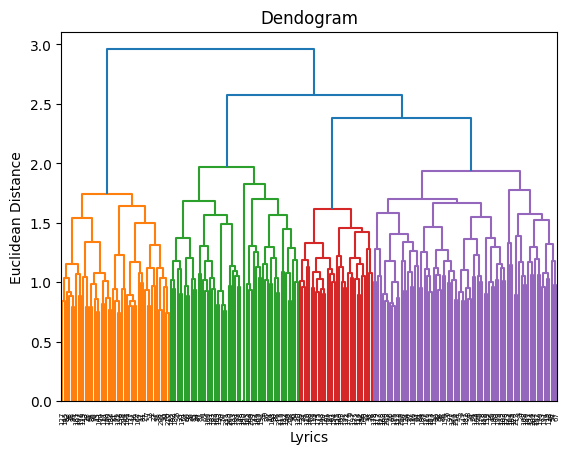

In [37]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(corpus_embeddings, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Lyrics')
plt.ylabel('Euclidean Distance')
plt.show()

Judging by the dendogram, we can take 4 clusters.

In [38]:
# Perform agglomerative clustering
clustering_model = AgglomerativeClustering(n_clusters=4,linkage='ward') 
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  4
['read news today boy lucky man grade news sad laugh photograph blew mind car notice light changed crowd people stood stared face house lord film today boy english army war crowd people turned read book love turn woke bed dragged comb head downstairs drank cup noticed late coat grabbed hat bus second flat upstairs smoke spoke dream read news today boy hole lancashire hole small count hole take albert hall love turn', 'bad kid moved neighborhood sitting good school learn read write sits house play rock roll music night thumb tack chair chewing gum hair junior behave buy rock roll book magazine stand dime jukebox man worry teacher till night aready poop rocking rolling spinning rock roll head hard rock junior behave ya mamma barber shop hair cut head shoot canary fed cat cocker spaniel bathing laundromat ya mamma head hard rock junior ooo', 'benefit kite tonight trampoline hendersons late pablo scene men horse hoop garter lastly hogshead real challenge celebrated performs feat

c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


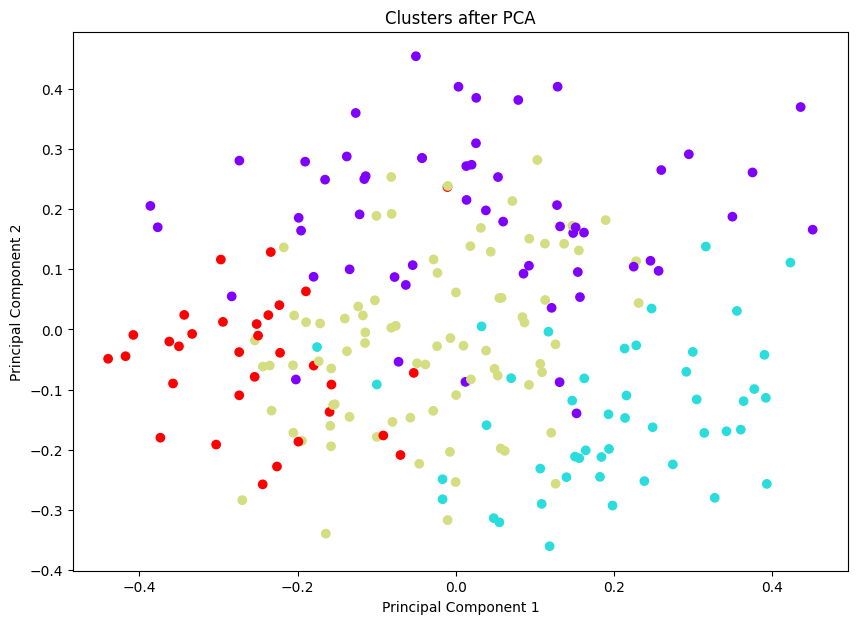

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Assuming X is your data and you want to cluster into 'n_clusters'
cluster = AgglomerativeClustering(n_clusters=4)
cluster_labels = cluster.fit_predict(corpus_embeddings)

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(corpus_embeddings)

plt.figure(figsize=(10,7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

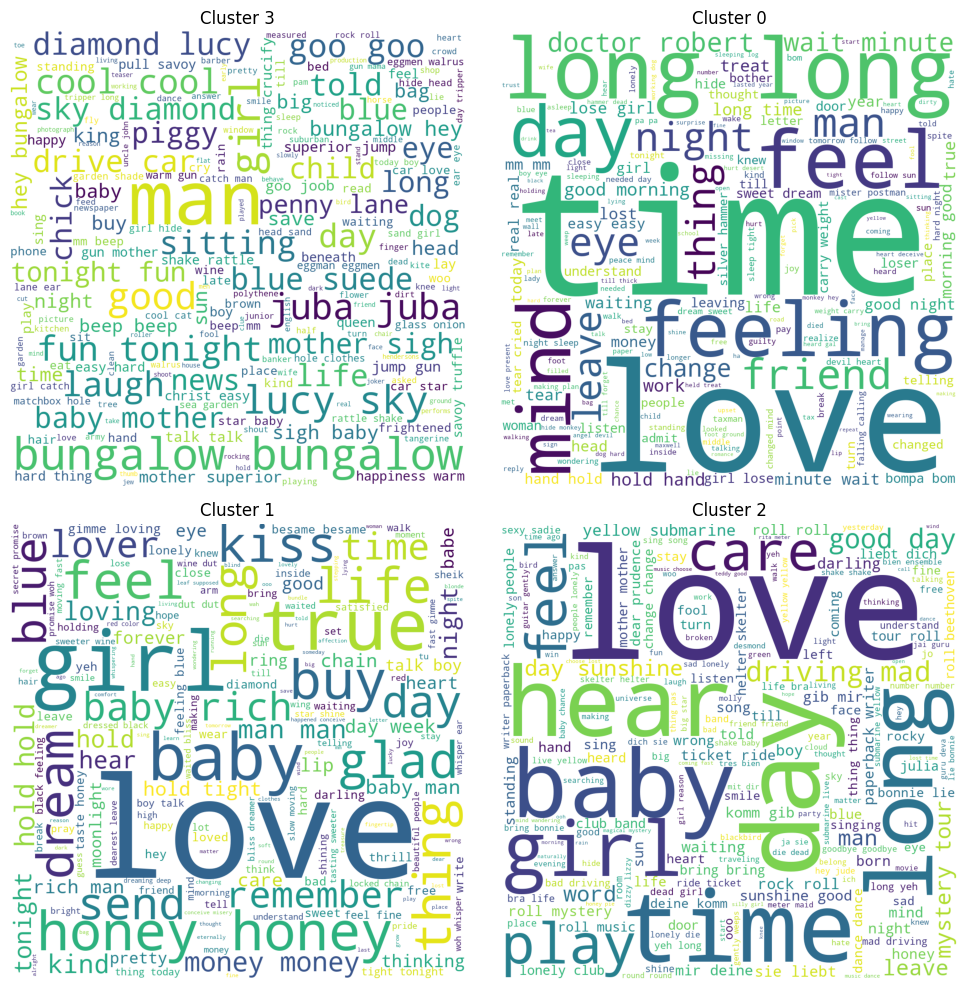

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample dictionary of clusters
clusters = clustered_sentences

# Initialize word cloud
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = set(), 
                min_font_size = 10)

plt.figure(figsize=(10,10))
for i, (cluster_num, sentences) in enumerate(clusters.items()):
    # Convert list of sentences into one single string
    text = ' '.join(sentences)
    
    # Generate the word cloud
    wordcloud.generate(text)
    
    # Plotting the WordCloud image
    plt.subplot(2, 2, i+1)  # assuming you have 4 clusters hence a 2x2 subplot grid
    plt.imshow(wordcloud)
    plt.title(f"Cluster {cluster_num}")
    plt.axis("off")

plt.tight_layout()
plt.show()

c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kme

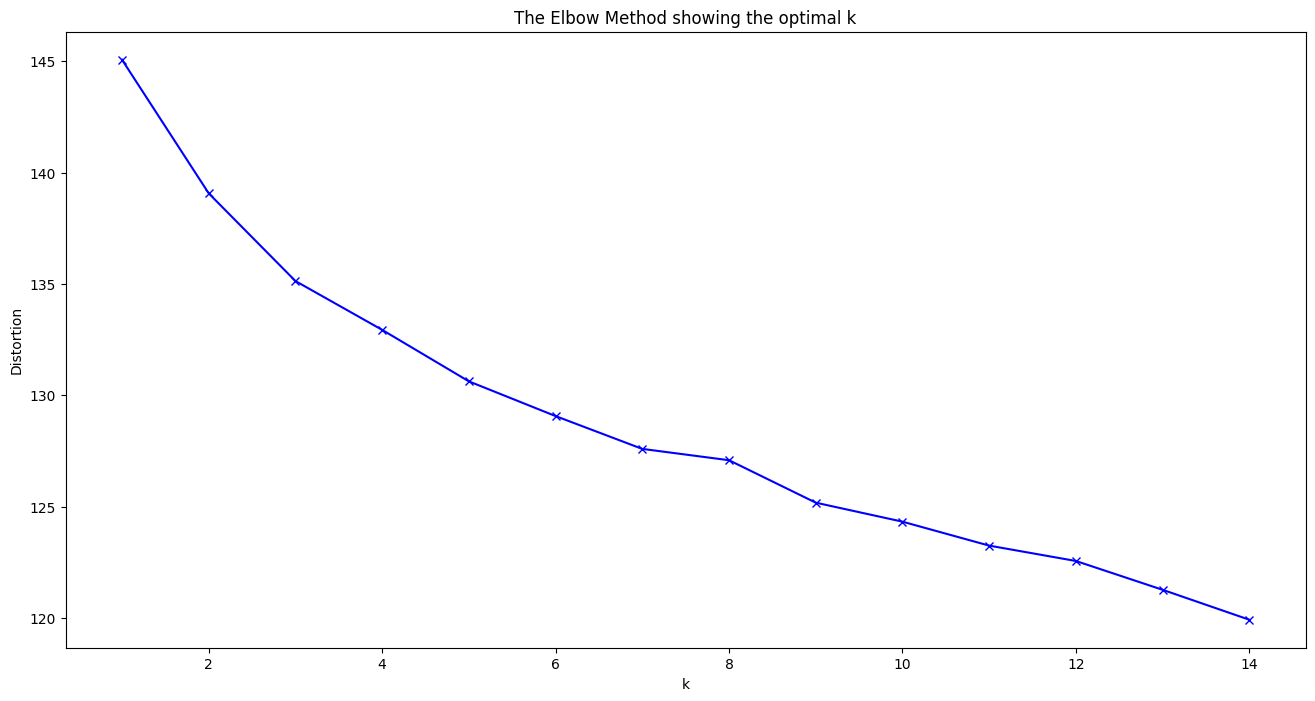

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming embeddings is your (215, 384) tensor
embeddings = corpus_embeddings  # Placeholder. Replace with your tensor.

# Elbow Method
distortions = []
K = range(1, 15)  # You can adjust the range based on your data and expectations
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(embeddings)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kme

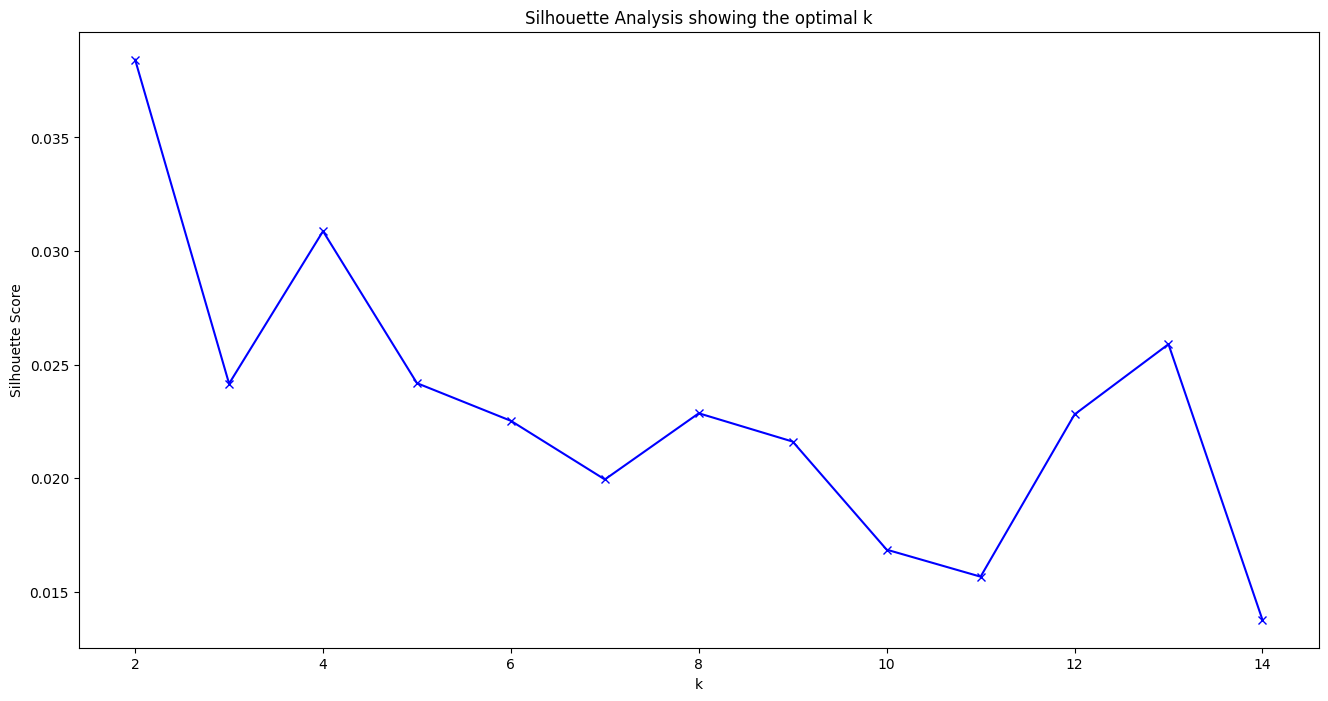

In [54]:
silhouette_scores = []
K = range(2, 15)  # Note: silhouette score requires at least 2 clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(embeddings)
    silhouette_avg = silhouette_score(embeddings, kmeanModel.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis showing the optimal k')
plt.show()

In [41]:
clustering_model = AgglomerativeClustering(n_clusters=4,linkage='ward') 
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

Lets compare kmeans clustering for predictions as agglomerative clustering does not allow predictions.

c:\Users\kinsh\OneDrive\Documents\Python Scripts\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


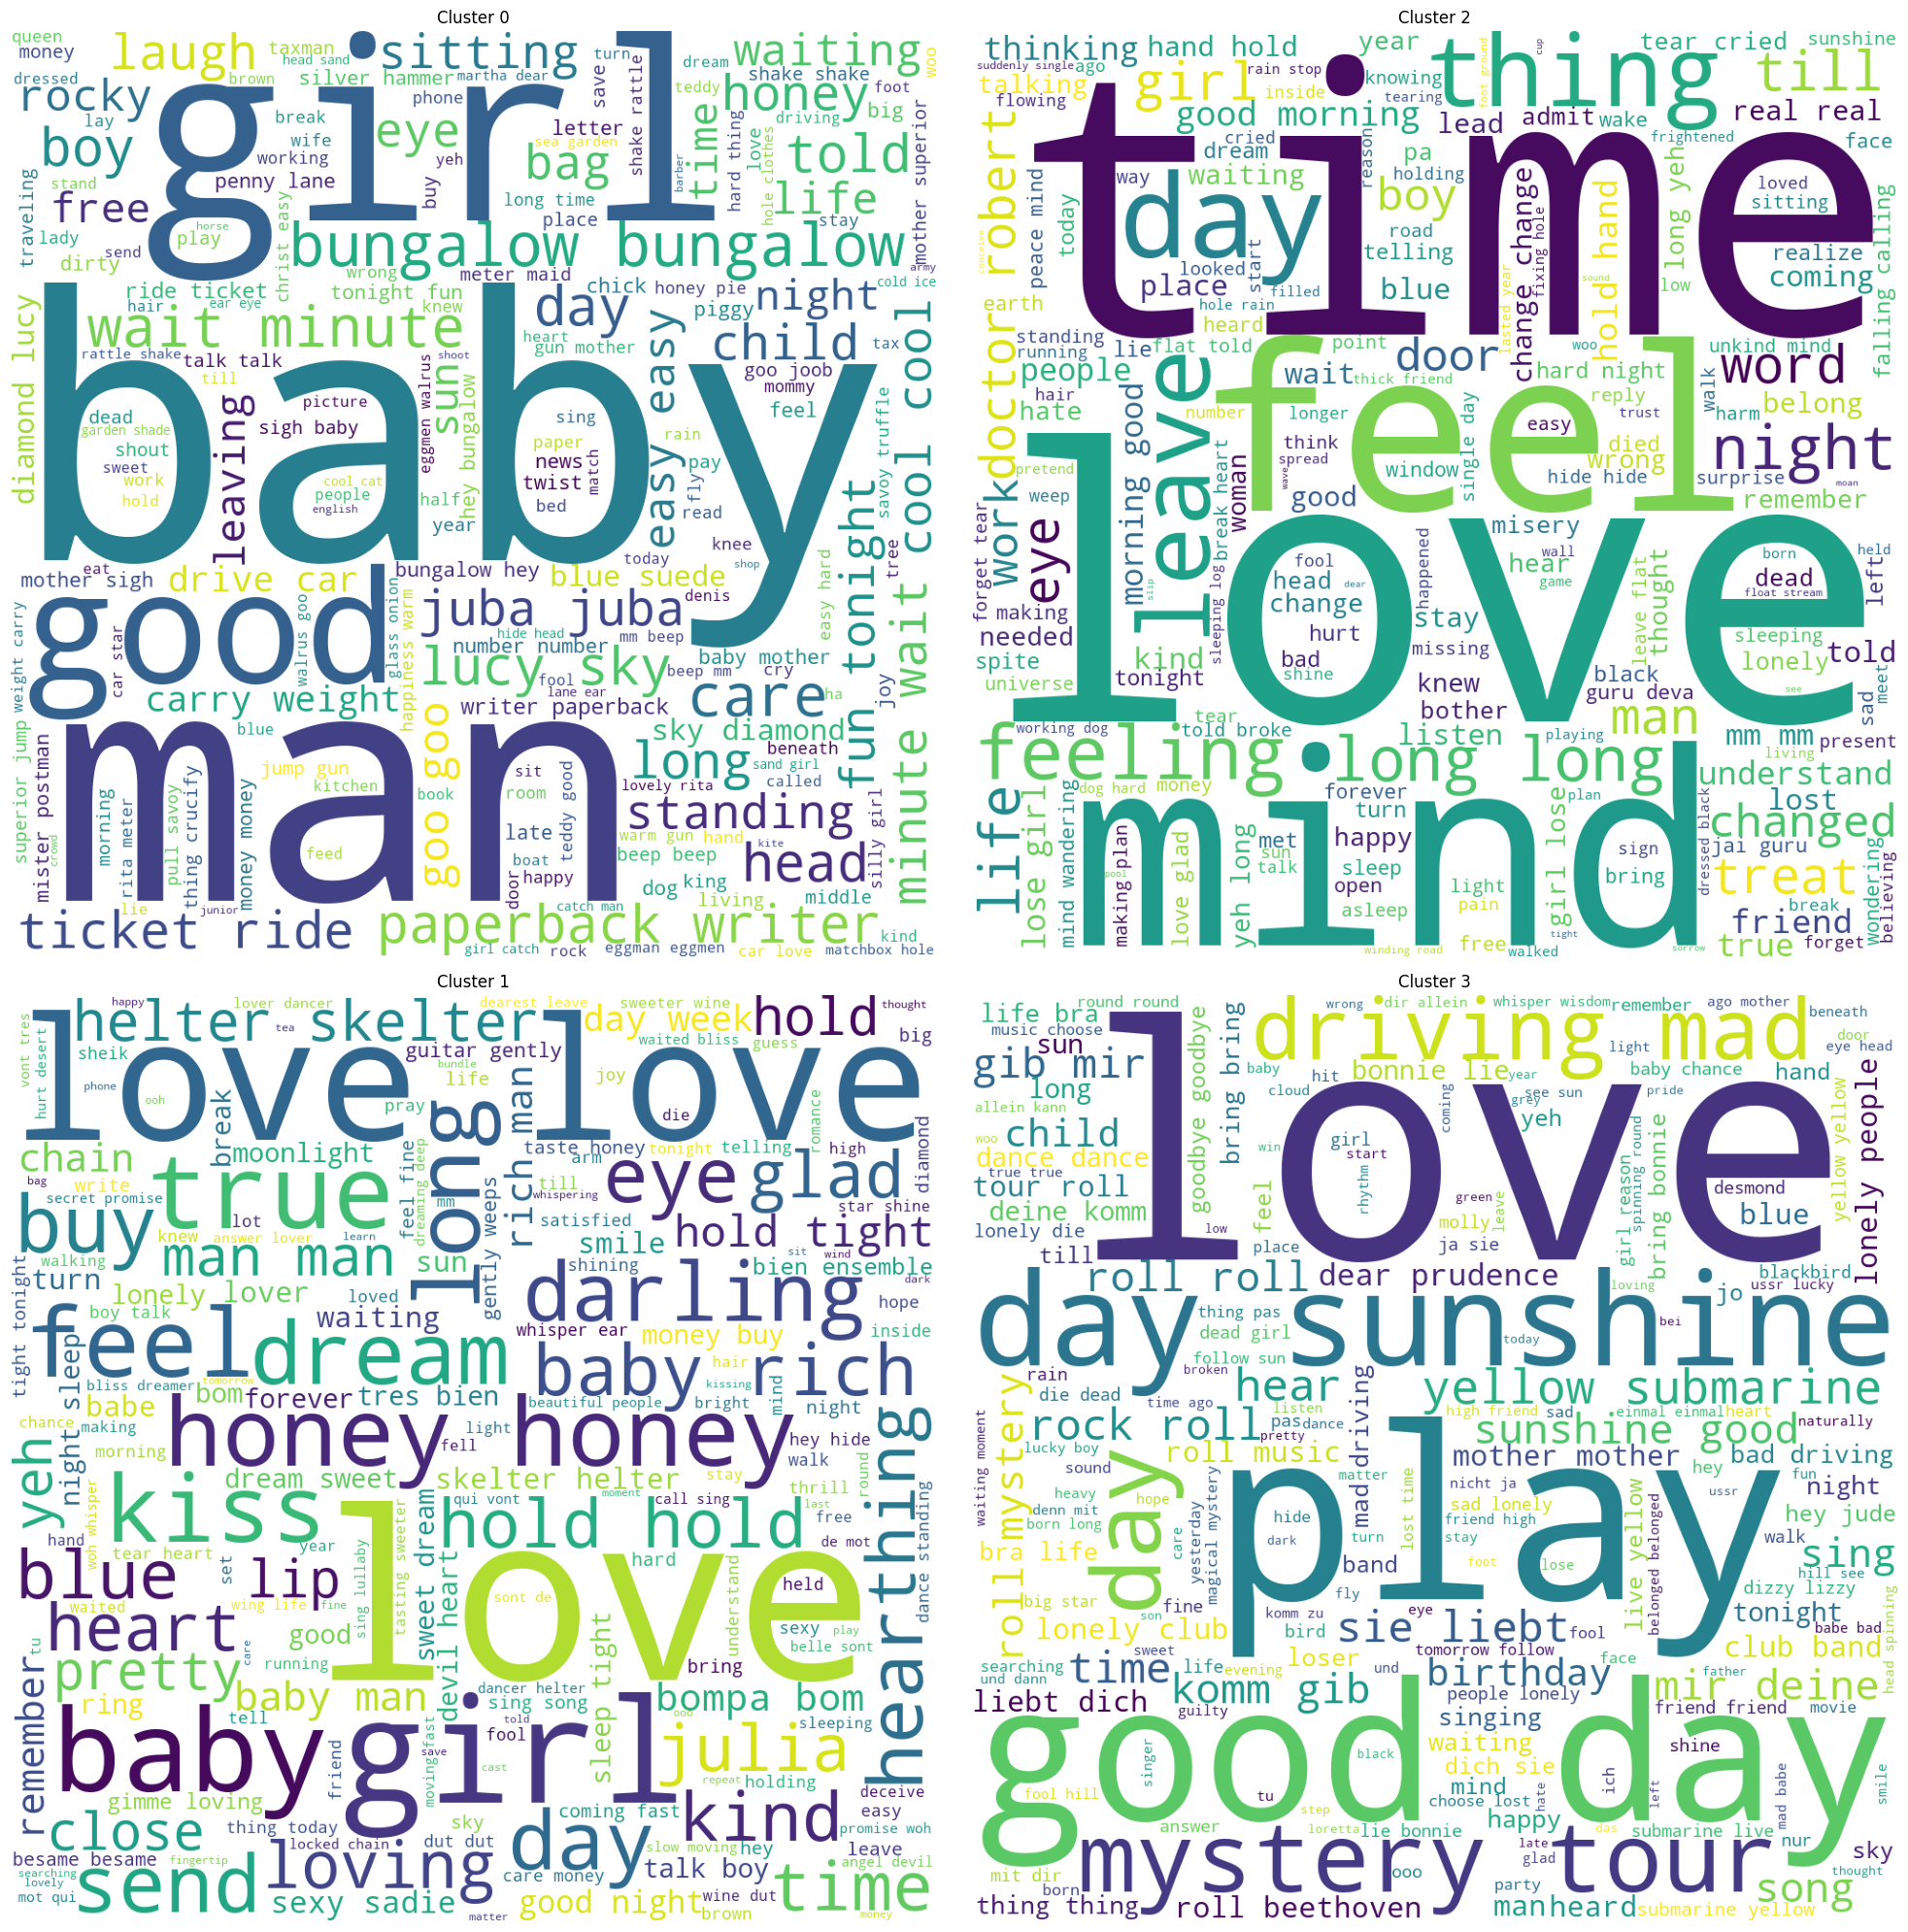

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(corpus_embeddings)

# Organize sentences into clusters
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(corpus[i])

# Generate word clouds
wordcloud = WordCloud(width=1000, height=1000, background_color='white', stopwords=set(), min_font_size=10)
plt.figure(figsize=(20, 20))

for i, (cluster_num, cluster_sentences) in enumerate(clusters.items()):
    text = ' '.join(cluster_sentences)
    wordcloud.generate(text)
    plt.subplot(2, 2, i+1)
    plt.imshow(wordcloud)
    plt.title(f"Cluster {cluster_num}")
    plt.axis("off")

plt.tight_layout()
plt.show()



In [ ]:
#Reading the song lyrics txt files
path_to_files = './new_lyrics/'
new_lyrics = {}
for filename in os.listdir(path_to_files):
    if filename.endswith(".txt"):
        with open(os.path.join(path_to_files, filename), 'r') as f:
            lyric = f.read()
            if lyric not in new_lyrics.values():
                new_lyrics[filename] = lyric

In [ ]:
# Predicting cluster for a new sentence
test_lyrics = list(new_lyrics.values())
corpus_2 = [preprocess_2(new_lyric) for new_lyric in test_lyrics]
corpus_embeddings_2 = embedder.encode(corpus_2)
# Normalize the embeddings to unit length
corpus_embeddings_2 = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

predicted_clusters = kmeans.predict(corpus_embeddings_2)

for lyric, cluster in zip(corpus_2, predicted_clusters):
    print(f"'{cluster}': {lyric}.")

In [85]:
corpus_3 = corpus + corpus_2

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4,linkage='ward') 
corpus_embeddings_3 = embedder.encode(corpus_2)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
